# Atividades da Aula

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


fonte = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'

dados = pd.read_csv(fonte)

provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

dados['NU_NOTA_TOTAL'] = dados[provas].sum(axis=1)

dados_sem_nota_zero = dados.query('NU_NOTA_TOTAL != 0')

In [24]:
provas_entrada = ["NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_CN","NU_NOTA_REDACAO"]
prova_saida = "NU_NOTA_MT"

#retirando todos os dados NaN (not a number)
dados_sem_nota_zero = dados_sem_nota_zero[provas].dropna()

notas_entrada = dados_sem_nota_zero[provas_entrada]
notas_saida = dados_sem_nota_zero[prova_saida]

In [25]:
x = notas_entrada
y = notas_saida 


from sklearn.model_selection import train_test_split

SEED = 4321

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25,
                                                        random_state=SEED)

In [26]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = SEED)
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=4321, tol=0.0001, verbose=0)

In [27]:
predicoes_matematica = modelo.predict(x_teste)

(-50.0, 1050.0)

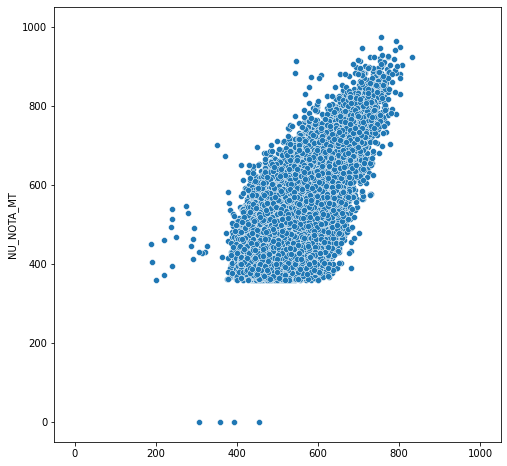

In [28]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=predicoes_matematica, y=y_teste)
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

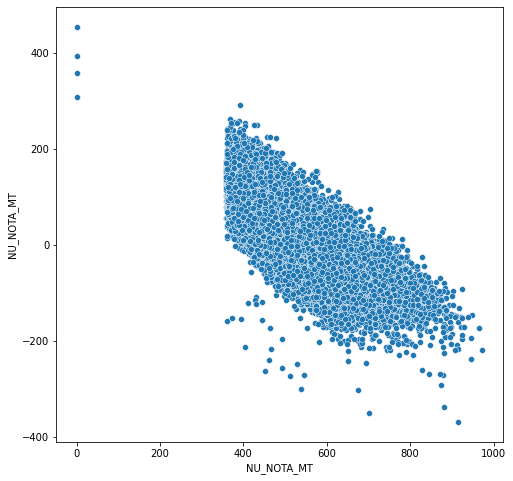

In [29]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste, y=predicoes_matematica - y_teste)

(-50.0, 1050.0)

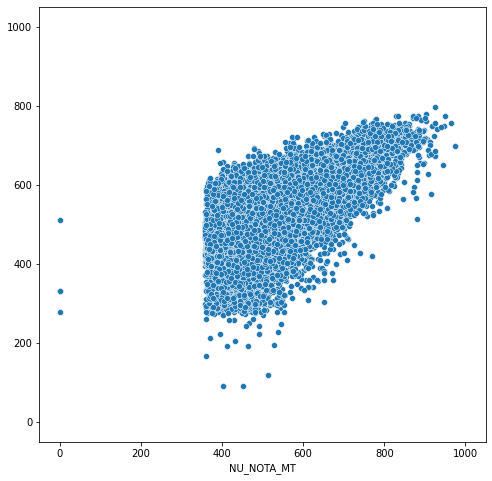

In [30]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste, y=x_teste.mean(axis=1))
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

In [31]:
resultados = pd.DataFrame()
resultados['Real'] = y_teste
resultados['Previsao'] = predicoes_matematica
resultados['Diferenca'] = resultados['Real']  - resultados['Previsao'] 
resultados['Diferenca_quadrado'] = (resultados['Real']  - resultados['Previsao'])**2
resultados

,Real,Previsao,Diferenca,Diferenca_quadrado
114991,459.7,564.486105,-104.786105,10980.127878
104685,617.2,628.305027,-11.105027,123.321625
91028,520.0,509.980986,10.019014,100.380650
115802,703.8,593.681144,110.118856,12126.162420
93303,627.1,579.784588,47.315412,2238.748252
...,...,...,...,...
81393,688.6,626.291851,62.308149,3882.305380
40159,479.1,652.313922,-173.213922,30003.062777
64083,501.4,607.787172,-106.387172,11318.230438
84661,772.5,734.227663,38.272337,1464.771772


In [32]:
resultados['Diferenca_quadrado'].mean()

6604.415306219529

In [33]:
resultados['Diferenca_quadrado'].mean()**(1/2)

81.26755383435341

In [34]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import  r2_score

mean_squared_error(y_teste, dummy_predicoes)

12063.645588509502

In [35]:
mean_squared_error(y_teste, predicoes_matematica)

6604.41530621957

Desafio01: Procurar outro modelo de ML para treinar e comparar com os modelos criados em aula

Desafio02: Ler a documentação do Dummy e alterar o método de regressão

Desafio03: Buscar outra métrica para avaliar modelos de regressão

# Desafio01: Procurar outro modelo de ML para treinar e comparar com os modelos criados em aula 

# &

# Desafio03: Buscar outra métrica para avaliar modelos de regressão

## Modelo ElasticNet

Selecionei o Modelo ElasticNet, que é um modelo linear que usa dois parâmentros de regulação, podemos incialmente e bem superficialmente dizer que ele seria a combinação dos modelos Lasso e Ridge.

A fim de não entrar tanto na estatística por trás a qual irei me aprofundar, deixarei a documentação:

https://scikit-learn.org/stable/modules/linear_model.html#elastic-net

In [36]:
from sklearn.linear_model import ElasticNet

In [37]:
modelo_ElasticNet = ElasticNet(random_state = SEED)
modelo_ElasticNet.fit(x_treino, y_treino)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=4321, selection='cyclic', tol=0.0001, warm_start=False)

In [38]:
predicoes_matematica_ElasticNet = modelo_ElasticNet.predict(x_teste)

# Iremos calcular o Erro Absoluto Médio (MAE), o Erro Quadrático Médio (MSE) e o Coeficiente de Determinação (R²)

mae_modelo_ElasticNet = mean_absolute_error(y_teste, predicoes_matematica_ElasticNet)

mse_modelo_ElasticNet = mean_squared_error(y_teste, predicoes_matematica_ElasticNet)

r2_modelo_ElasticNet = r2_score(y_teste, predicoes_matematica_ElasticNet)

## Modelo de Regressão Linear

In [39]:
from sklearn.linear_model import LinearRegression

modelo_RegLinear = LinearRegression()
modelo_RegLinear.fit(x_treino, y_treino)


predicoes_matematica_RegLinear = modelo_RegLinear.predict(x_teste)

# Iremos calcular o Erro Absoluto Médio (MAE), o Erro Quadrático Médio (MSE) e o Coeficiente de Determinação (R²)

mae_modelo_RegLinear = mean_absolute_error(y_teste, predicoes_matematica_RegLinear)

mse_modelo_RegLinear = mean_squared_error(y_teste, predicoes_matematica_RegLinear)

r2_modelo_RegLinear = r2_score(y_teste, predicoes_matematica_RegLinear)

## Modelo Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor

modelo_RandForest = RandomForestRegressor(max_depth = 5)
modelo_RandForest.fit(x_treino, y_treino)

# Iremos calcular o Erro Absoluto Médio (MAE), o Erro Quadrático Médio (MSE) e o Coeficiente de Determinação (R²)

predicoes_matematica_RandForest = modelo_RandForest.predict(x_teste)

mae_modelo_RandForest = mean_absolute_error(y_teste, predicoes_matematica_RandForest)

mse_mmodelo_RandForest = mean_squared_error(y_teste, predicoes_matematica_RandForest)

r2_modelo_RandForest = r2_score(y_teste, predicoes_matematica_RandForest)

## BASE DE COMPARAÇÃO

- Erro Absoluto Médio (MAE): É a média dos erros absolutos entre os valores reais e os valores preditos.

- Erro Quadrático Médio (MSE): É a média ddos erros ao quadrado entre os valores reais e os valores preditos.
  - MSE é sempre positivo e quanto mais próximo de zero melhor.

- Coeficiente de Determinação (R²): Quantifica a diferença entre a linha elaborada pelo equação do modelo de regressão e a média.
  - Valor que varia de 0 a 1, sendo 0 o indicador que o modelo proposto não melhora a predição e 1 o indicador de uma predição perfeita.

fonte: https://www.scielo.br/scielo.php?script=sci_arttext&pid=S0102-77862011000400009#:~:text=A%20medida%20mais%20simples%20derivada,precipitação%20em%20relação%20ao%20observado.&text=A%20média%20dos%20erros%20absolutos,em%20Inglês)%20contorna%20este%20problema.

In [41]:
#faltou calcular os mae, mse e r2 da aula como variável para facilitar.

mae_modelo_SVR = mean_absolute_error(y_teste, predicoes_matematica)

mse_modelo_SVR = mean_squared_error(y_teste, predicoes_matematica)

r2_modelo_SVR = r2_score(y_teste, predicoes_matematica)

In [42]:
#montando um DataFrame para comparar os modelos

modelos = [('Linear SVR', mae_modelo_SVR, mse_modelo_SVR,r2_modelo_SVR),
           ('ElasticNet', mae_modelo_ElasticNet, mse_modelo_ElasticNet, r2_modelo_ElasticNet),
           ('Linear Regression', mae_modelo_RegLinear, mse_modelo_RegLinear, r2_modelo_RegLinear),
           ('Random Forest', mae_modelo_RandForest, mse_mmodelo_RandForest, r2_modelo_RandForest)]

df_modelos = pd.DataFrame(modelos, columns =['Model', 'MAE', 'MSE', 'R²'])
df_modelos.columns.name = 'Index'

In [43]:
df_modelos

Index,Model,MAE,MSE,R²
0,Linear SVR,66.045554,6604.415306,0.452445
1,ElasticNet,62.333715,5961.364693,0.505759
2,Linear Regression,62.333185,5961.372212,0.505758
3,Random Forest,59.212489,5460.160608,0.547312


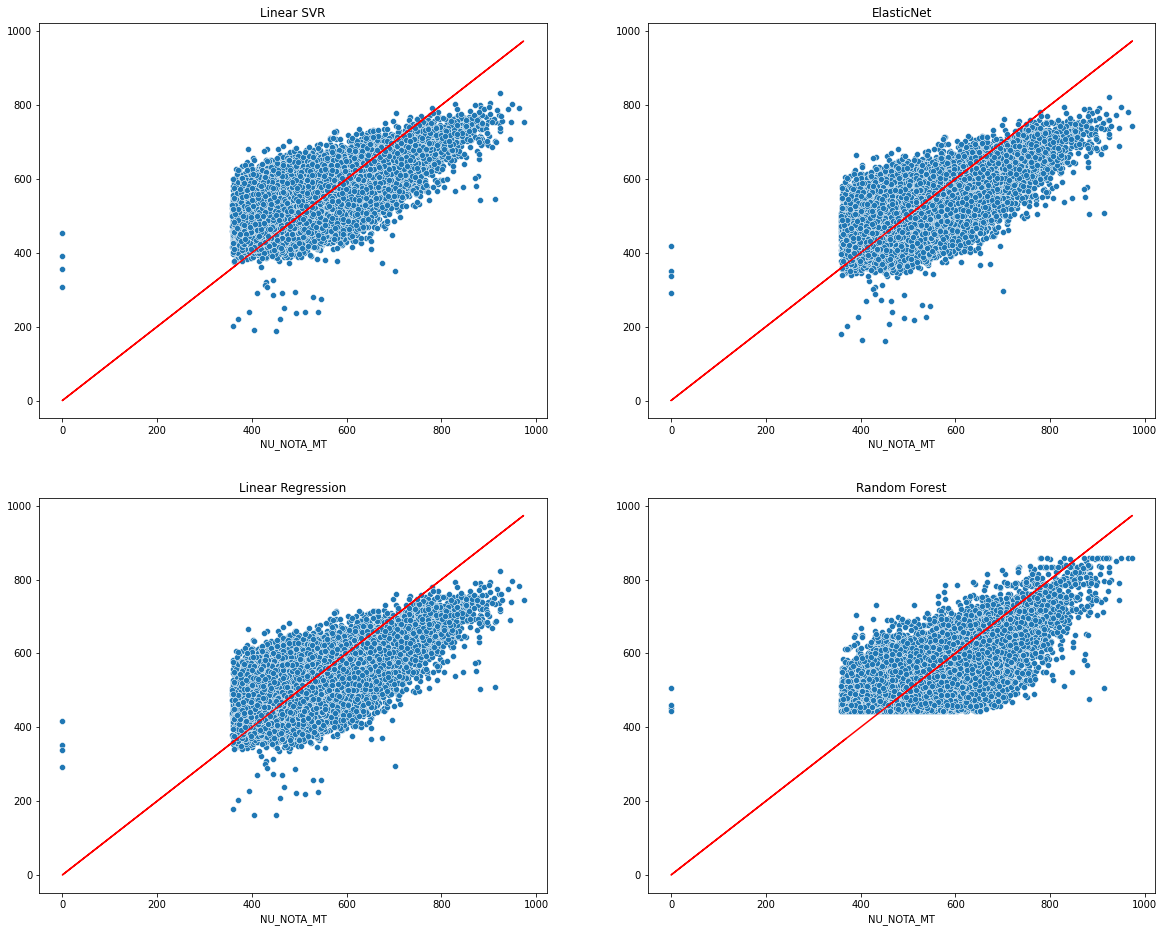

In [54]:
fig, ax = plt.subplots(2,2, figsize=(20, 16)) 
ax[0,0].set_title('Linear SVR')
ax[0,1].set_title('ElasticNet')
ax[1,0].set_title('Linear Regression')
ax[1,1].set_title('Random Forest')

sns.scatterplot(x=y_teste, y=predicoes_matematica, ax=ax[0,0])
sns.scatterplot(x=y_teste, y=predicoes_matematica_ElasticNet, ax=ax[0,1])
sns.scatterplot(x=y_teste, y=predicoes_matematica_RegLinear, ax=ax[1,0])
sns.scatterplot(x=y_teste, y=predicoes_matematica_RandForest, ax=ax[1,1])

ax[0,0].plot(y_teste, y_teste, 'r')
ax[0,1].plot(y_teste, y_teste, 'r')
ax[1,0].plot(y_teste, y_teste, 'r')
ax[1,1].plot(y_teste, y_teste, 'r')


plt.show()

Analisando sem muita base estatística ainda, podemos ver que o método Random Forest além de ter o menor erro absoluto, e o melhor coeficiente de determinação.

Porém ele favorece a quem tiraria uma nota mais baixa até um 410, e a partir de 600 ele penaliza e determina uma nota um pouco menor do que era esperado.

# Desafio02: Ler a documentação do Dummy e alterar o método de regressão

No método Dummy, temos quatro parâmetros de estratégia para gerar predição, assim irei comparar os mesmos apenas com a tabela, sem plotar gráficos.

In [55]:
#Conforme fora calculado:

#colocando a estratégia de média
modelo_dummy_mean = DummyRegressor(strategy='mean')
modelo_dummy_mean.fit(x_treino, y_treino)
dummy_predicoes_mean = modelo_dummy_mean.predict(x_teste)


mae_modelo_dummy_mean = mean_absolute_error(y_teste, dummy_predicoes_mean)
mse_modelo_dummy_mean  = mean_squared_error(y_teste, dummy_predicoes_mean)
r2_modelo_dummy_mean  = r2_score(y_teste, dummy_predicoes_mean)


#colocando a estratégia de média
modelo_dummy_median = DummyRegressor(strategy='median')
modelo_dummy_median.fit(x_treino, y_treino)
dummy_predicoes_median  = modelo_dummy_median.predict(x_teste)


mae_modelo_dummy_median = mean_absolute_error(y_teste, dummy_predicoes_median)
mse_modelo_dummy_median  = mean_squared_error(y_teste, dummy_predicoes_median)
r2_modelo_dummy_median  = r2_score(y_teste, dummy_predicoes_median)


#colocando a estratégia de quartil
modelo_dummy_quantil = DummyRegressor(quantile=0.7)
modelo_dummy_quantil.fit(x_treino, y_treino)
dummy_predicoes_quantil  = modelo_dummy_quantil.predict(x_teste)


mae_modelo_dummy_quantil = mean_absolute_error(y_teste, dummy_predicoes_quantil)
mse_modelo_dummy_quantil  = mean_squared_error(y_teste, dummy_predicoes_quantil)
r2_modelo_dummy_quantil  = r2_score(y_teste, dummy_predicoes_quantil)


modelos_dummy = [('Dummy Mean',mae_modelo_dummy_mean, mse_modelo_dummy_mean, r2_modelo_dummy_mean),
           ('Dummy Median', mae_modelo_dummy_median, mse_modelo_dummy_median, r2_modelo_dummy_median),
           ('Dummy Quantile', mae_modelo_dummy_quantil, mse_modelo_dummy_quantil, r2_modelo_dummy_quantil)]

df_modelos = pd.DataFrame(modelos_dummy, columns =['Model', 'MAE', 'MSE', 'R²'])
df_modelos.columns.name = 'Index'

In [57]:
df_modelos

Index,Model,MAE,MSE,R²
0,Dummy Mean,90.387175,12063.645589,-0.000165
1,Dummy Median,89.052338,12599.969972,-0.044631
2,Dummy Quantile,90.387175,12063.645589,-0.000165


Fontes de apoio:

https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/


https://www.scielo.br/scielo.php?script=sci_arttext&pid=S0102-77862011000400009#:~:text=A%20medida%20mais%20simples%20derivada,precipitação%20em%20relação%20ao%20observado.&text=A%20média%20dos%20erros%20absolutos,em%20Inglês)%20contorna%20este%20problema.

https://towardsdatascience.com/bayesian-linear-regression-in-python-using-machine-learning-to-predict-student-grades-part-1-7d0ad817fca5